# 제32회 ADP 실기 대비 - 핵심만 요약한 통계와 머신러닝 파이썬 코드북

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 설정

# Colab 한글 폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rcParams['font.family'] = 'NanumBarunGothic'

# 8장. 회귀 분석
- 회귀 분석 방법은 예측 변수와 회귀계수의 선형 결합으로 종속변수를 표현할 수 있는지 여부에 따라 선형 회귀와 비선형 회귀로 나누어진다.
- 선형 회귀에는 단순 선형 회귀, 다중 선형 회귀, 규제 선형 회귀, 일반화 선형 회귀, 이상치에 강한 선형 회귀 등이 있다.
- 비선형 회귀에는 다항 회귀, 스플라인 회귀, GAM 등이 있다.

## 8-1. 선형 회귀(Linear regression)
- 선형 회귀는 가장 간단하고 오래된 회귀용 선형 알고리즘이다.
- 입력변수에 대한 선형 함수 즉, 기울기와 절편으로 이루어진 직선의 방정식을 만들어 예측을 수행한다.
- 선형 회귀는 예측과 타겟 사이의 평균제곱오차(MSE, Mean Squared Error)를 최소화하는 회귀계수인 w(기울기 혹은 가중치)와 b(절편)를 찾는다.
- 잔차제곱합을 최소화하는 최소제곱법(OLS, Ordinary Least Squares)에 따른 회귀방법이기 때문에 특이값에 민감하다.
- 단순 선형 회귀는 직선의 형태이고, 다중 선형 회귀는 직선의 형태는 아니지만 각 계수와 그 변수들 사이의 관계는 여전히 선형이기 때문에 선형모형이다.
- 선형 회귀모델을 적합한 후에는 잔차 분석을 통해 해당 모델이 선형 회귀의 가정을 위배하지 않는 유효한 모델인지 확인해야 한다.

[용어정리]
- X: 예측변수 = 설명변수 = 입력변수 = 독립변수 = feature
- Y: 결과변수 = 반응변수 = 출력변수 = 종속변수 = target
- $\hat{Y}$: Y hat = 적합값 = 예측값 = predicted value
- w: 회귀계수 = 기울기 = 가중치 = coefficient
- b: 회귀계수 = 절편 = 상수항 = intercept = constant
- 오차(Error): 관측치와 모회귀선과의 편차
- 잔차(Residual): 관측치와 표본회귀선과의 편차

[선형 회귀의 가정]
- 정규성: 잔차가 정규분포의 형태를 띈다.
- 등분산성: 독립변수와 무관하게 잔차의 분산이 일정하다.
- 선형성: 종속변수는 예측 변수와 회귀계수의 선형 결합(Linear combination)으로 표현할 수 있다.
- 독립성: 잔차들은 서로 독립이다. 또한, 독립변수들은 서로 선형적으로 독립이다.

[회귀 분석의 전처리]
- 일반적인 데이터 전처리: 결측치, 이상치 등은 본 책의 <2-1. 결측치 처리>와 <2-2. 이상치 처리>를 참고한다.
- 범주형 변수 처리: 범주형 변수는 회귀를 위해 수치형 변수로 변환해야 한다. 범주의 개수가 n개인 범주형 변수를 처리하는 가장 흔한 방법은 (n-1)개의 가변수를 가지도록 더미코딩하는 것이다. n개의 특성으로 변환하는 원-핫 인코딩은 다중공선성의 문제가 있기 때문에 회귀에서 사용하지 않는다. 순서를 갖는 범주형 변수의 경우, 순서에 따른 수치형 변수로 변환하여 사용할 수 있다. <2-4-2. 범주형 변수 변환>을 참고한다.
- 영향치(Influential value) 처리: 영향치는 회귀모형에서 제외됐을 때 회귀식에 중요한 변화를 가져오는 특정 데이터이다. 회귀 분석에서 잔차가 크다고 해서 모두 이런 값이 되는 것은 아니다. 잔차가 크든 작든, 회귀 결과에 큰 영향을 미치는 경우 회귀에 대해 높은 레버리지(Leverage)를 갖는다고 한다. 레버리지를 측정하는 척도로는 Leverage H, Cook's distance, DFBETAS, DFFITS 등이 있다.
- 다중공선성(Multicolinearity) 처리: 다중공선성은 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 이는 선형 회귀의 가정인 독립성을 위배하는 것으로서, 회귀계수의 분산이 비정상적으로 커져 회귀방정식의 계수 추정에 불안정성을 유발할 수 있다. 다중공선성 문제를 해결하기 위한 방법으로는, 사전 지식이나 직관을 활용하여 상관관계가 높은 독립변수들 중 일부를 제거하는 방법, 변수 선택법, 분산팽창요인(VIF, Variance Inflation Factor)을 계산하여 일부 변수를 제거하는 방법 등이 있다.
- 종속변수 스케일링: 잔차 분석 결과 등분산성이나 정규성 가정을 위반하는 경우, 종속변수에 Box-cox 변환, 로그 변환 등을 시도할 수 있다 <2-4-1. 수치형 변수 변환>을 참고할 수 있다.

[잔차 분석]
- 적합(fitting)한 모델의 잔차 분석 결과가 선형 회귀의 가정을 위반하는 경우, 위에서 언급한 전처리 과정을 다시 거치거나 데이터를 리샘플링함으로써 통계적으로 유효한 모델을 적합해야 한다.

### 8-1-1. 단순 선형 회귀(Simple Linear Regression)
- 독립변수 X와 종속변수 Y의 정보를 가지고, 일차 방정식의 계수 w, b를 찾는 과정이 단순 선형 회귀 알고리즘이다.

[용어 정리]
- SSR(Sum of squares regression) = ESS(Explained sum of squares)
- SSE(Sum of squares residual error) = RSS(Residual sum of squares)
- SST(Sum of squares total) = TSS(Total sum of squares)

In [2]:
from sklearn.datasets import load_diabetes

# 데이터 불러오기
data = load_diabetes() 
Xa = data['data']
ya = data['target']

diabetes = pd.DataFrame(np.c_[Xa, ya], columns=data['feature_names'] + ['target'])

# 단순 선형 회귀 적합을 위해 전체 데이터에서 1개의 설명변수와 1개의 종속변수를 추출
X = np.array(diabetes.filter(['bmi'])).ravel() # numpy로 계산하기 위해 데이터 형태 변환
Y = np.array(diabetes.filter(['target'])).ravel()

print(f"데이터 확인: {X[:3]}, {Y[:3]}")

데이터 확인: [ 0.06169621 -0.05147406  0.04445121], [151.  75. 141.]


In [3]:
Xm = np.mean(X)
Ym = np.mean(Y)
w = sum((X-Xm) * (Y-Ym)) / sum((X-Xm)**2) # 기울기
b = Ym - w * Xm # 절편

print(f"기울기 점추정량: {round(w, 3)}")
print(f"절편   점추정량: {round(b, 3)}")
print(f"표본 회귀식: Y = {round(b, 3)} + {round(w, 3)} * X")

기울기 점추정량: 949.435
절편   점추정량: 152.133
표본 회귀식: Y = 152.133 + 949.435 * X


In [4]:
# 기울기, 절편 추정량으로 구한 예측값
Ypred = b + X*w

SSR = sum((Ym - Ypred)**2)
SSE = sum((Y - Ypred)**2)
SST = sum((Y - Ym) ** 2)

R2 = SSR / SST
R = np.corrcoef(X, Y)[0][1] # X, Y의 상관계수

# X, Y의 상관계수의 제곱은 X, Y로 적합한 단순 선형회귀 모델의 결정계수와 같다.
print(f"결정계수(=R2): {round(R2, 3)}(={round(R**2, 3)})")
print(f"상관계수(=R) : {round(R, 3)}(={round(np.sqrt(R2), 3)})")

결정계수(=R2): 0.344(=0.344)
상관계수(=R) : 0.586(=0.586)


In [5]:
# 회귀계수의 가설검정 (F검정, 유의수준 5%)
# 귀무가설(H0): 모든 회귀계수는 0이다.
# 대립가설(H1): 적어도 하나의 회귀계수는 0이 아니다.

from scipy.stats import f
treat_df = 1 # 처리의 자유도 (설명변수의 개수)
resid_df = len(X) - treat_df - 1 # 잔차의 자유도 (전체 데이터의 개수 - 설명변수의 개수 -1)

MSR = SSR / treat_df
MSE = SSE / resid_df

fstat = MSR / MSE
print(f"MSE: {round(MSE, 3)}, MSR: {round(MSR, 3)}, F-통계량: {round(fstat, 3)}")
print(f"가설검정: F({treat_df}, {resid_df}) p-value: {round(1-f.cdf(fstat, treat_df, resid_df), 3)}")

MSE: 3908.14, MSR: 901427.314, F-통계량: 230.654
가설검정: F(1, 440) p-value: 0.0


In [6]:
# statsmodel 방법
import statsmodels.api as sm

X = diabetes.filter(['bmi'])
Y = diabetes.filter(['target'])

Xc = sm.add_constant(X) # 절편 추가
model = sm.OLS(Y, Xc)

fitted = model.fit()
resid = fitted.resid # 모델의 잔차 추출
fitted.summary() # 모델 결과 요약

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           3.47e-42
Time:                        23:32:21   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# sklearn 방법
from sklearn.linear_model import LinearRegression
X = diabetes.filter(['bmi'])
Y = diabetes.filter(['target'])

LR = LinearRegression()
LR.fit(X, Y)

pred = LR.predict(X) # 회귀모델로 X값에 대한 예측값 생성

print(f"회귀계수: {LR.coef_}")
print(f"절편: {LR.intercept_}")
print(f"결정계수: {round(LR.score(X, Y), 3)}")

회귀계수: [[949.43526038]]
절편: [152.13348416]
결정계수: 0.344


In [8]:
# 기울기, 절편, Y의 평균값에 대한 추정과 검정
print("[추정과 검정]")
X = np.array(diabetes.filter(['bmi'])).ravel() #numpy로 계산하기 위해 데이터 형태 변환
Y = np.array(diabetes.filter(['target'])).ravel()

# resid_std를 계산하여 세가지 추정과 검정에 사용
resid_std = np.sqrt(MSE)
resid_std2 = np.std(fitted.resid, ddof=2)
print(f"잔차 표준오차: {round(resid_std, 3)}(= {round(resid_std2, 3)})")

[추정과 검정]
잔차 표준오차: 62.515(= 62.515)


#### 기울기의 추정과 검정

In [9]:
from scipy.stats import t

print(f"기울기 점추정량: {round(w, 3)}")

SE = resid_std / np.sqrt(sum((X - Xm)**2)) # 잔차표준편차 / X편차의 제곱합
print(f"기울기 점추정량의 표준오차: {round(SE, 3)}")

conf_a = 0.05
start = w + t.ppf(conf_a / 2, resid_df) * SE 
end = w + t.ppf(1-conf_a / 2, resid_df) * SE
print(f"기울기 신뢰구간: {round(start, 3)} ~ {round(end, 3)}")

# 기울기의 가설검정 (t검정, 유의수준 5%)
# 귀무가설(H0): 기울기 w0는 0이다
# 대립가설(H1): 기울기 w0는 0이 아니다.
test_a = 0.05
w0 = 0
tstat = (w - w0) / SE
print(f"검정통계량 {round(tstat, 3)}, p-value {round(1-t.cdf(tstat, resid_df)**2, 3)}")

기울기 점추정량: 949.435
기울기 점추정량의 표준오차: 62.515
기울기 신뢰구간: 826.57 ~ 1072.301
검정통계량 15.187, p-value 0.0


#### 절편의 추정과 검정

In [10]:
Xi = 0
Y1 = b + w * Xi
print(f"점추정량: {round(Y1, 3)}") # 절편의 기댓값

SE2 = resid_std * np.sqrt(1 / len(X) + (Xi - Xm) **2 / sum((X -Xm)**2))
print(f"점추정량의 표준오차: {round(SE2, 3)}")

start2 = Y1 + t.ppf(conf_a / 2, resid_df) * SE2 
end2 = Y1 + t.ppf(1-conf_a / 2, resid_df) * SE2
print(f"점추정량의 신뢰구간: {round(start2, 3)} ~ {round(end2, 3)}")

# 절편의 가설검정 (t검정, 유의수준 5%)
# 귀무가설(H0): 절편 b0는 0이다
# 대립가설(H1): 절편 b0는 0이 아니다.

test_a = 0.05
b0 = 0
tstat2 = (b-b0) / SE2
print(f"검정통계량 {round(tstat2, 3)}, p-value {round((1-t.cdf(np.abs(tstat2), resid_df))*2, 3)}")

점추정량: 152.133
점추정량의 표준오차: 2.974
점추정량의 신뢰구간: 146.289 ~ 157.978
검정통계량 51.162, p-value 0.0


#### 특정한 X값(0.15) 추정과 검정

In [11]:
# Y의 평균값의 추정
Xi = 0.15 # X값 입력
Y2 = b + w * Xi
print(f"점추정량: {round(Y2, 3)}")

SE3 = resid_std * np.sqrt(1 / len(X) + (Xi - Xm)**2 / sum((X - Xm)**2))
print(f"점추정량의 표준오차: {round(SE3, 3)}")

start3 = Y2 + t.ppf(conf_a / 2, resid_df) * SE3 
end3 = Y2 + t.ppf(1-conf_a / 2, resid_df) * SE3
print(f"신뢰구간: {round(start3, 3)} ~ {round(end3, 3)}".format(start3, end3))

# Y 평균값의 가설검정 (t검정, 유의수준 5%)
# 귀무가설(H0): Y2_0는 0이다
# 대립가설(H1): Y2_0는 0이 아니다
test_a = 0.05
Y2_0 = 0
tstat3 = (Y2 - Y2_0) / SE3
print(f"검정통계량 {round(tstat3, 3)}, p-value {round((1-t.cdf(np.abs(tstat3), resid_df))*2, 3)}")

점추정량: 294.549
점추정량의 표준오차: 9.837
신뢰구간: 275.215 ~ 313.883
검정통계량 29.942, p-value 0.0


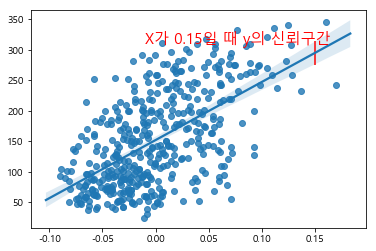

In [12]:
# 회귀직선의 신뢰대 (각 X값에 대한 Y 평균값들의 신뢰구간) 시각화
fig, ax = plt.subplots(1, 1)
sns.regplot(x=X, y=Y, ax=ax)
ax.vlines(x=0.15, ymin=start3, ymax=end3, color='red')
ax.text(-0.01, 310, f"X가 {Xi}일 때 y의 신뢰구간", color='red', size=15)
plt.show()

### 8-1-2. 다중 선형 회귀

In [13]:
from sklearn.datasets import load_diabetes

# 데이터 불러오기
data = load_diabetes() 
Xa = data['data']
ya = data['target']

diabetes = pd.DataFrame(np.c_[Xa, ya], columns = data['feature_names'] + ['target'])

# 다중 선형 회귀 적합을 위해 전체 데이터에서 4개의 설명변수와 1개의 종속변수를 추출
X = diabetes.filter(['bmi', 'age', 'sex', 'bp'])
y = diabetes.filter(['target'])

# 회귀 분석 fitted객체, 요약결과 반환하는 함수 정의
def multiR_fitted(X, y): # return fitted, summary
    X_ = sm.add_constant(X)
    model = sm.OLS(y, X_)
    fitted = model.fit()
    return fitted, fitted.summary()

fitted, summary = multiR_fitted(X, y)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.70e-47
Time:                        23:32:21   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.853     53.329      0.000     146.527     157.740
bmi          787.1793     65.424     12.032      0.000     658.594     915.764
age           37.2412     64.117      0.581      0.562     -88.776     163.258
sex         -106.5775     62.125     -1.716      0.087    -228.679      15.524
bp           416.6738     69.495      5.996      0.000     280.088     553.259
==============================================================================
Omnibus:                        9.858   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.464
Skew:                           0.146   Prob(JB):                       0.0395
Kurtosis:                       2.485   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 영향치 판단
- p는 예측변수의 개수, n은 데이터의 크기를 의미하며, 아래는 영향치를 판단하는 척도들이다.
    - Cook's distance: 레버리지와 잔차의 크기를 합쳐서 영향력을 판단한다.
        - 4 / (n-p-1) 보다 크면 영향력이 높다고 본다. 쿡의 거리가 기준값이 1보다 클 경우 영향치로 간주한다.
    - DFBETAS: 값이 커지면 관측치가 영향치 혹은 이상치일 가능성이 높다. 기준값은 2나 $2/\sqrt{n}$을 사용하며 기준값보다 클 경우 영향치로 간주한다.
    - DFFITS: 특정 관측치 제외 시 종속변수 예측치의 변화 정도를 측정한 값이다. 기준값인 $2\sqrt{(p+1)/n}$보다 클수록 영향치일 가능성이 높다고 본다.
    - Leverage H: 2(p+1)/n 이상의 값들은 레버리지가 높은 데이터 값이다.

In [14]:
# 각 데이터의 영향치 판단값 계산
def get_influence(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    dfb = fitted.get_influence().dfbetas[:, 0]
    dff = fitted.get_influence().dffits_internal[0]
    lev = fitted.get_influence().hat_matrix_diag
    df = pd.DataFrame({"cooks_distance":cook, 'dfbetas':dfb, 'dffits':dff, 'leverageH':lev})
    return df

influ_df = get_influence(fitted)  
influ_df

,cooks_distance,dfbetas,dffits,leverageH
0,0.001516,-0.043867,-0.087061,0.008908
1,0.000350,-0.024198,-0.041811,0.006743
2,0.001478,-0.033422,-0.085965,0.014950
3,0.003736,0.061662,0.136681,0.011133
4,0.000003,-0.002047,-0.003823,0.007869
...,...,...,...,...
437,0.000049,-0.008507,-0.015638,0.007629
438,0.000002,-0.001460,-0.003347,0.011865
439,0.000045,-0.008745,-0.015040,0.006677
440,0.000531,0.026808,0.051509,0.008339


In [15]:
# 영향치로 판단되는 데이터 추출하기
def find_idx_cooks(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    P = fitted.get_influence().k_vars #변수의 개수
    score = 4 / (len(y) - P - 1)
    if score <= 1:
        idx = np.where(cook > score)[0]
    else:
        idx = np.where(cook > 1)[0]
    return idx

idx = find_idx_cooks(fitted) # 영향치의 인덱스
print("Cook's distance 기준 영향치: ", idx)

Cook's distance 기준 영향치:  [  9  78  92 102 117 141 147 152 204 211 256 289 328 336 343 380 417]


In [16]:
def find_idx_dfbetas(fitted):
    dfb = fitted.get_influence().dfbetas[:,0]
    n = fitted.df_resid + fitted.df_model + 1
    score = 2/np.sqrt(n)
    if score <= 2:
        idx = np.where(dfb > score)[0]
    else:
        idx = np.where(dfb > 2)[0]
    return idx
idx2 = find_idx_dfbetas(fitted)
print("DFBETAS 기준 영향치: ", idx2)

DFBETAS 기준 영향치:  [  9  37  78 102 141 152 190 218 359 364]


In [17]:
def find_idx_dffits(fitted):
    dff = fitted.get_influence().dffits_internal[0]
    P = fitted.get_influence().k_vars
    n = fitted.df_resid + fitted.df_model + 1
    score = 2*np.sqrt((P+1)/n)
    idx = np.where(dff > score)[0]
    return idx
idx3 = find_idx_dffits(fitted)
print("DFFITS 기준 영향치: ", idx3)

DFFITS 기준 영향치:  [  9 102 117 141 256]


In [18]:
def find_idx_leverageH(fitted):
    lh = fitted.get_influence().hat_matrix_diag
    P = fitted.get_influence().k_vars
    n = fitted.df_resid + fitted.df_model + 1
    score = 2*(P+1)/n
    idx = np.where(lh > score)[0]
    return idx
idx4 = find_idx_leverageH(fitted)
print("Leverage H 기준 영향치: ", idx4)

Leverage H 기준 영향치:  [130 145 256 261 340 366 367 408]


#### 분산팽창요인(VIF, Variance Inflation Factor) 계산
- 분산팽창요인은 선형 회귀에 변수들이 추가되는 경우 매개변수 추정의 분산 증가에 대한 측정치로서 다중공선성(Multicolinearity)의 척도이다.
- VIF가 10 이상일 때, 설명변수들이 높은 상관성(Collinear)을 가진다고 본다.
- 한편, 범주형 변수가 다중 선형 회귀에 포함되어 있을 경우, 더미코딩을 통해 다중공선성 문제를 피할 수 있다. 
- 회귀모형에 일반적으로 절편이 포함되기 때문에 p-1개의 이진변수의 값을 정의하고 나면, p번째 값을 알 수 있고, 따라서 p번째 값까지 넣게 되면 이러한 중복성이 문제가 될 수 있다.
- 따라서 p번째 열을 추가하지 않음으로써 다중공선성 오류를 피할 수 있다.

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def check_vif(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    model.fit()
    vif_df = pd.DataFrame(columns=['feature', 'VIF'])
    for i in range(1, len(model.exog_names)):
        vif_df.loc[i, 'feature'] = model.exog_names[i]
        vif_df.loc[i, 'VIF'] = round(VIF(model.exog, i), 3)
    return vif_df.sort_values('VIF', ascending=False)

# 모든 feature들의 VIF가 10 미만이기 때문에 다중공선성이 없다고 볼 수 있다.
check_vif(X, y)

,feature,VIF
4,bp,1.343
1,bmi,1.19
2,age,1.143
3,sex,1.073


#### 변수 선택과 가능도
- 변수 선택법은 AIC를 최소로 하거나 수정 결정계수를 최대로 하는 변수의 조합을 가지는 최적 회귀 방정식을 찾는 방법이다.
- 단계적 방법(Stepwise method), 전진선택법(Forward selection), 후진제거법(Backward elmination)이 있다.

[변수를 선택하는 기준들]
- p는 설명변수의 개수, n은 데이터의 개수, SST는 전체 제곱합, SSE는 잔차 제곱합, MSE는 잔차 제곱합의 평균, $\log_{L_i}$는 로그 가능도의 최댓값
- 수정 결정계수(Adjusted R squared): 모델에 변수를 추가할수록 기존의 결정계수에 불이익을 주며 모형의 적합도를 판단하는 척도이다.
    - $Adjusted\ R^2=1-(1-R^2)(n-1)/(n-p-1)$
- AIC(Akaike's Information Criteria): 모델에 변수를 추가할수록 불이익을 주는 오차 측정법이다.
    - $AIC = -2\log{L_i}+2(p+1)$ : 절편이 있는 경우 p+1, 없으면 p
- BIC(Bayesian Information Criteria): AIC와 비슷하지만 변수 추가에 대해 더 강한 벌점을 준다.
    - $BIC = -2\log{L_i}+\log(n)(p+1)$: 절편이 있는 경우 p+1, 없으면 p
- Mallows $C_p$: Colin Lingwood Mallows가 제안한 AIC의 변형이다. $C_p$값이 작고, (p+상수의 개수)와 비슷할 수록 편향이 작고 우수한 모델이라고 판단한다. 후보 설명변수들로 적합한 모델의 $SSE_p$와 전체 설명변수로 적합했을 때의 $MSE_full$로 아래와 같이 $C_p$를 구한다.
    - $C_p=\frac{SSE_p}{MSE_{full}}-n+2(p+1)$

[가능도]
- 가능도(=우도, likelihood)는 확률분포의 모수가 어떤 확률변수의 표집값과 일관되는 정도를 나타내는 값이다.
- 주어진 표집값에 대한 모수의 가능도는 이 모수를 따르는 분포가 주어진 관측값에 대하여 부여하는 확률이다.
- 즉, 어떤 모델의 가능도가 높을수록 모델의 추정량이 실제 모수 값에 가깝다고 할 수 있다.
- 가능도 함수는 확률분포가 아니며, 합한 값이 1이 되지 않을 수도 있다.
- 로그 가능도(log likelihood)는 가능도 함수에 로그를 씌운 것인데, 확률분포함수가 곱셈꼴로 나올 때 미분 계산의 편의성을 위해 가능도 함수 대신 사용한다.
- 로그함수는 단조증가하기 때문에 가능도 함수에서 최댓값을 갖는 위치와 로그 가능도에서 최댓값을 가지는 위치는 동일하다.
- 선형 회귀에서 잔차는 서로 독립이고, 평균은 0, 모분산은 $\sigma^2$인 정규분포를 따른다는 가정이 있다.
- 이에 따라 아래와 같이 잔차($=y_i-(\beta_0+\beta_1x_i))$의 가정을 활용하여, 모수인 회귀계수$(B_0,B_1)$와 모분산$(\sigma^2)$에 대해 가능도를 계산할 수 있다.
- 각 관측값$(x_i)$에 대하여 모수가 $B_0, B_1, \sigma^2$일 때 $y_i$일 확률값을 계산하고, 이 확률값들은 서로 독립이기에 모두 곱하여 가능도 값을 얻는다.
- 실제로는 아직 모수값을 모르기 때문에 그 추정값인 $b_0,b_1,s^2$을 사용한다.

In [20]:
# 모든 변수를 포함한 full model
print("full model = const, bp, bmi, age, sex")
fitted, summary = multiR_fitted(X, y)
R2 = fitted.rsquared
n = fitted.nobs # number of observations
p = fitted.df_model # 설명변수의 개수
constant = 'const' in fitted.params.keys() # 절편 유무

SSE = sum((fitted.resid)**2) # full model의 잔차제곱합
MSE_full = SSE / (n-p-1) # fitted.mse_resid (MSE)
adj_R2 = 1- (1-R2)*(n-1)/(n-p-1)
print(f"수정 결정계수: {round(adj_R2, 3)}")

# 수기계산 및 라이브러리 계산
llf = -n / 2 * np.log(2 * np.pi) - n / 2 * np.log(SSE / n) - n / 2 #로그 가능도 값 (=fitted.llf)
aic = -2 * llf + 2 * (p + constant) # fitted.aic와 동일
bic = -2 * llf + np.log(n)*(p + constant) # fitted.bic와 동일
print(f"AIC: {round(aic, 1)}(= {round(fitted.aic, 1)})")
print(f"BIC: {round(bic, 1)}(= {round(fitted.bic, 1)})")

cp = SSE / MSE_full - n + 2 * (p+1)
print(f"Cp {round(cp, 1)} -> 변수 + 상수 개수의 합 {p+constant}")

full model = const, bp, bmi, age, sex
수정 결정계수: 0.395
AIC: 4878.4(= 4878.4)
BIC: 4898.8(= 4898.8)
Cp 5.0 -> 변수 + 상수 개수의 합 5.0


In [21]:
# 일부 변수만 포함한 후보 model
print("후보 model = const, bp, bmi")
fitted2, summary2 = multiR_fitted(X.filter(['bp', 'bmi']), y)
n = fitted2.nobs #number of observations
p = fitted2.df_model #설명변수의 개수
constant = 'const' in fitted2.params.keys() #절편 유무
SSE2 = sum((fitted2.resid)**2) #후보 model의 잔차제곱합
adj_R2 = 1- (1-R2)*(n-1)/(n-p-1)
print(" 수정 결정계수: {:.3f}".format(adj_R2))

#수기계산 및 라이브러리 계산
llf = -n/2*np.log(2*np.pi) - n/2*np.log(SSE2 / n) - n/2 #로그 가능도 값
aic = -2*llf + 2*(p + constant)
bic = -2*llf + np.log(n)*(p + constant)
print(" AIC: {:.1f}(= {:.1f})".format(aic, fitted2.aic))
print(" BIC: {:.1f}(= {:.1f})".format(bic, fitted2.bic))

cp = SSE2/MSE_full - n + 2*(p+1) # 비교모델의 MSE가 아닌 위에서 구한 full모델의 MSE
print(" Cp {:.1f} -> 변수+상수 개수의 합 {}".format(cp, p+constant))

후보 model = const, bp, bmi
 수정 결정계수: 0.398
 AIC: 4877.5(= 4877.5)
 BIC: 4889.8(= 4889.8)
 Cp 4.1 -> 변수+상수 개수의 합 3.0


In [22]:
## 단계적 선택법
import statsmodels.api as sm
from itertools import combinations

def stepwise_method(X, y, criterion='AIC'): #'BIC', 'CP', 'adj_R2'
    result = pd.DataFrame()
    feature_combis = [] #변수 조합의 모든 경우의 수
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse() #p개수 내림차순
    
    for j, feature_combi in enumerate(feature_combis):
        X_ = X.filter(feature_combi)
        X_ = sm.add_constant(X_) #절편 추가
        model = sm.OLS(y, X_)
        fitted = model.fit() #모델 적합
        n = fitted.nobs #number of observations
        p = fitted.df_model #설명변수의 개수
        if j==0:
            MSE_full = fitted.mse_resid # full모델의 MSE
        
        #각 기준값 계산
        aic = fitted.aic
        bic = fitted.bic
        cp = sum((fitted.resid)**2)/MSE_full - (n-2*(p+1))
        adj_R2 = fitted.rsquared_adj
        
        #각 기준값 입력
        result.loc[j, 'feature_combi'] = ", ".join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = aic
        result.loc[j, 'BIC'] = bic
        result.loc[j, 'CP'] = cp
        result.loc[j, 'adj_R2'] = adj_R2
        
        if criterion in ['AIC', 'BIC']: #낮을수록 Best
            result = result.sort_values(by=criterion, ascending = True)
            best = result.iloc[0, 0]
        elif criterion in ['adj_R2']: #높을수록 Best
            result = result.sort_values(by=criterion, ascending = False)
            best = result.iloc[0, 0]
        elif criterion in ['CP']: #CP값이 작고, 변수의 개수와 유사할수록 Best
            best_idx = np.abs(result['CP']-result['feature_combi'].apply(lambda x: x.count(',')+1)).sort_values(ascending=True).index
            result = result.loc[best_idx, :]
            best = result.iloc[0, 0]
        else:
            print("criterion options only cover AIC, BIC, CP, adj_R2.")
    return best, result

In [23]:
# AIC 기준으로 단계적 선택법을 통한 최적의 변수 선택 결과는 다음과 같다.
best, result = stepwise_method(X, y, criterion='AIC')
print("최적의 변수 조합: ", best)
print(f"전체 결과값: \n{result}\n")

for c in ['AIC', 'BIC', 'CP', 'adj_R2']:
    best, result = stepwise_method(X, y, c)
    print(f"기준 {c}에 의한 최적의 변수 조합 {best}")

최적의 변수 조합:  const, bmi, sex, bp
전체 결과값: 
               feature_combi          AIC          BIC          CP    adj_R2
2        const, bmi, sex, bp  4876.695411  4893.060650    3.337361  0.395687
8             const, bmi, bp  4877.487868  4889.761797    4.109107  0.393242
0   const, bmi, age, sex, bp  4878.354321  4898.810871    5.000000  0.394771
3        const, bmi, age, bp  4879.321065  4895.686305    5.943049  0.392087
10           const, bmi, age  4909.624337  4921.898267   37.300082  0.347484
4       const, bmi, age, sex  4911.296550  4927.661789   38.949213  0.346479
14                const, bmi  4912.038221  4920.220840   40.050212  0.342433
9            const, bmi, sex  4913.987529  4926.261459   41.995389  0.341010
5             const, sex, bp  5002.161858  5014.435788  147.526881  0.195519
11                 const, bp  5002.506590  5010.689210  148.630613  0.193078
1        const, age, sex, bp  5002.827282  5019.192522  147.767635  0.196113
6             const, age, bp  5003.

#### 잔차 분석
- 잔차 분석 결과 회귀 분석의 가정을 만족하지 못하는 경우, 데이터 전처리(이상치, 영향치 처리, 다중공선성 제거, 종속변수 스케일링 등)를 진행한 후 새로운 모델을 적합하여 다시 잔차를 확인해야 한다.

In [24]:
from scipy.stats import zscore, probplot

X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
fitted = model.fit()
resid = fitted.resid # 잔차
pred = fitted.fittedvalues #예측값
sresid = zscore(resid) #표준화 잔차

print("예측값: \n", pred[:5].values)
print("실제값: \n", y[:5].values.ravel())
print("잔차: \n", resid[:5].values)
print("표준화 잔차: \n", sresid[:5])

예측값: 
 [205.82972979 105.33175612 182.53703825 129.17333187 137.56411038]
실제값: 
 [151.  75. 141. 206. 135.]
잔차: 
 [-54.82972979 -30.33175612 -41.53703825  76.82666813  -2.56411038]
표준화 잔차: 
 0   -0.919416
1   -0.508620
2   -0.696516
3    1.288273
4   -0.042996
dtype: float64


1. 정규성 가정 확인: 
 Jarque-bera: stats 6.464, p-value 0.039
 왜도 0.146, 첨도 2.485


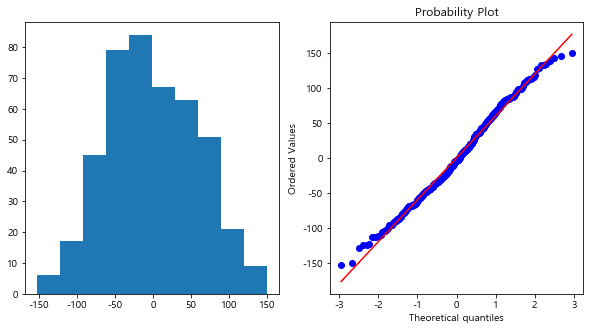

In [25]:
from statsmodels.stats.stattools import jarque_bera
print("1. 정규성 가정 확인: ") #히스토그램, QQ plot, Jarque-Bera
stats, p, skew, kurt = jarque_bera(resid)
print(" Jarque-bera: stats {:.3f}, p-value {:.3f}".format(stats, p))
print(" 왜도 {:.3f}, 첨도 {:.3f}".format(skew, kurt))
# Jarque bera 검정 결과, 유의수준 0.05 기준으로 정규분포와 차이가 있다(H1).
# 정규분포는 왜도는 0, 첨도는 3을 따르는데 해당 기준으로는 다소 차이가 있다.

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(resid)
probplot(resid, plot=ax[1])

# 히스토그램과 QQ plot 상으로는 정규분포와 근접해 보인다.
plt.show()

2. 등분산성 가정 확인: 


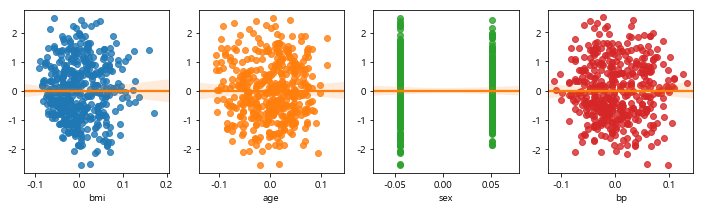

In [26]:
print("2. 등분산성 가정 확인: ")
fig, ax = plt.subplots(1,4, figsize=(12,3))
for feature, ax in zip(X.columns, ax.ravel()):
    sns.regplot(x=X[feature], y=sresid, line_kws={'color':'C1'}, ax=ax)

# 각 독립변수와 잔차의 분산이 일정하면 가운데 회귀선이 수평하게 표시된다.
# 표준화 잔차의 값이 +/-2를 벗어나면 이상값 또는 특이값을 예상할 수 있다.
# 모든 독립변수에서 잔차의 분산이 일정한 것으로 보인다.     
plt.show()

In [27]:
print("3. 독립성 가정 확인: ")
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)

# dw값이 2에 가까우면 잔차 간 독립이고, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관이 있다고 본다.
# 따라서 잔차 간 독립인 것으로 보인다.
print(" Durbin-watson 통계량 {:.3f}".format(dw))

3. 독립성 가정 확인: 
 Durbin-watson 통계량 1.933


### 8-1-3. 규제 선형 회귀(Regularized linear regression)
- 규제 선형 회귀 방법은 잔차의 최소제곱합을 최소화하도록 회귀계수를 최적화하는 동시에, 패널티 함수를 수식에 추가하는 규제(=정규화, Regularization)를 적용함으로써 회귀계수의 값들이 과다 추정되는 것을 막고, 모델의 과적합(Overfitting)을 방지하는 회귀 모델이다.
- 패널티 함수의 형태에 따라 릿지 회귀(Ridge regression), 라쏘 회귀(Lasso regression), 엘라스틱넷(Elastic net)이 잇다.
- 잔차의 최소제곱합에서 릿지 회귀는 회귀계수의 제곱합 항을 추가하는 방식이고, 라쏘 회귀는 회귀계수의 절댓값 항을 추가하는 방식이며, 엘라스틱 넷은 이 둘을 결합한 방식이다.
- scikit-learn에서 제공하는 함수를 사용할 경우, 규제의 정도는 파라미터 alpha로 조정할 수 있다.
- alpha값이 클수록 규제가 커져 모델의 복잡성이 낮아지고, alpha값이 작을수록 규제가 작아져 모델이 복잡해지며 과적합 가능성이 높아진다.

[Norm, 노름, 놈]
- norm의 사전적 정의는 규범이다. 수학에서 말하는 norm은 실수 또는 복소베터 공간에서 음이 아닌 실수로 사상되는 함수로서, 그 값은 원점으로부터의 거리로 이해될 수 있다. 거리를 구하는 방법에 따라 다양한 norm이 있는데 absolute-value norm, euclidean norm, manhattan norm, maximum norm, zero norm 등이 있다.
- 릿지 회귀에서 페널티 항으로 사용하는 norm은 $L_2$ norm이라고도 불리는 euclidean norm이고, $||x||_2 := \sqrt{x_1^2+...+x_n^2}$로 표기한다.
- 라쏘 회귀에서 페널티 항으로 사용하는 norm은 $L_1$ norm이라고도 불리는 manhattan norm이고, $||x||_1 := \sum_{i=1}^{n}|x_i|$로 표기한다.

#### 릿지 회귀
- $\sum_{i=1}^n (y_i-\hat{y_i})^2 + \alpha\sum_{j=1}^{p}\beta_j^2$를 최소화 하는 회귀계수들$(B_i)$의 값을 찾는 방법이다.
- 선형 회귀 모델에서 회귀계수에 $L_2$ 규제를 주는 방법으로서 회귀계수의 절댓값을 가능한 한 작게 0에 가깝게 한다.
- 작은 데이터셋에서는 선형 회귀보다 릿지 회귀의 점수가 더 좋지만, 데이터가 충분히 많아지면 규제항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 비슷해진다.

In [28]:
# 앞서 불러온 데이터셋 사용
X = diabetes.filter(['bmi', 'age', 'sex', 'bp'])
y = diabetes.filter(['target'])

# 일반화 성능 확인을 위해 데이터를 train set과 test set으로 나눈다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.linear_model import Ridge
# alpha값이 커질수록 규제가 커져 모델의 복잡성이 낮아진다. (일반화 된다.)
a = 0.9
ridge = Ridge(alpha=a).fit(X_train, y_train)
print(f"[alpha = {a}]")

train_s = ridge.score(X_train, y_train)
test_s = ridge.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))

for i, coef in enumerate(ridge.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(ridge.intercept_[0]))

[alpha = 0.9]
 train set score: 0.334, test set score: 0.247
 회귀계수 0: 363.93
 회귀계수 1: 92.68
 회귀계수 2: -15.81
 회귀계수 3: 278.23
 절편: 151.10


In [30]:
a = 0.1
print(f"[alpha = {a}]")
ridge = Ridge(alpha=a).fit(X_train, y_train)
train_s = ridge.score(X_train, y_train)
test_s = ridge.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(ridge.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(ridge.intercept_[0]))

[alpha = 0.1]
 train set score: 0.418, test set score: 0.321
 회귀계수 0: 643.46
 회귀계수 1: 64.31
 회귀계수 2: -87.59
 회귀계수 3: 463.09
 절편: 151.30


#### 라쏘 회귀
- $\sum_{i=1}^n (y_i-\hat{y_i})^2 + \alpha\sum_{j=1}^{p}|\beta_j|$를 최소화하는 회귀계수들 $(\beta_j)$의 값을 찾는 방법이다.
- 선형 회귀 모델에서 회귀계수에 $L_1$ 규제를 주는 방법이다.
- $L_1$ 규제로 계수를 0에 가깝게 만들려고 하며, 실제로 어떤 계수는 0이 된다.
- 모델에서 어떤 특성은 제거된다는 뜻이다.
- 이와 같이 특성 선택이 자동으로 되기 때문에 모델에서 중요한 특성만 남길 수 있다.
- 한 특성씩 좌표축을 따라 최적화하는 좌표 하강법(Coordinate descent)을 사용하며 학습과정이 반복적으로 진행되면서 최적의 값을 찾게 된다.
- 일반적으로 릿지 회귀를 선호하지만, 특성이 아주 많고 그 중 일부분만 중요하다면 라쏘를 선택한다. 또한 분석하기 쉬운 모델을 원한다면 라쏘가 입력 특성 중 일부만 사용하기 때문에 해석이 쉽다.

In [31]:
from sklearn.linear_model import Lasso
# alpha값이 커질수록 규제가 커져 모델의 복잡성이 낮아진다. (일반화 된다.)
a = 0.9
lasso = Lasso(alpha=a).fit(X_train, y_train)
print(f"[alpha = {a}]")
train_s = lasso.score(X_train, y_train)
test_s = lasso.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(lasso.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(lasso.intercept_[0]))

[alpha = 0.9]
 train set score: 0.331, test set score: 0.280
 회귀계수 0: 453.33
 회귀계수 1: 0.00
 회귀계수 2: -0.00
 회귀계수 3: 208.03
 절편: 151.15


In [32]:
a = 0.1
print(f"[alpha = {a}]")
lasso = Lasso(alpha=a).fit(X_train, y_train)
train_s = lasso.score(X_train, y_train)
test_s = lasso.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(lasso.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(lasso.intercept_[0]))

[alpha = 0.1]
 train set score: 0.419, test set score: 0.328
 회귀계수 0: 691.52
 회귀계수 1: 5.92
 회귀계수 2: -51.95
 회귀계수 3: 473.99
 절편: 151.42


#### 엘라스틱 넷
- 선형 회귀 모델에서 $L_1$ 규제와 $L_2$ 규제를 결합하여 규제를 주는 방법이다.
- scikit-learn의 ElasticNet에서 규제 정도는 alpha로 지정하고, $L_1$ 규제와 $L_2$ 규제의 조합 비율은 l1_ratio로 정한다.
- 자세한 공식은 scikit-learn의 공식 문서에서 확인할 수 있다.

In [33]:
from sklearn.linear_model import ElasticNet
# alpha는 패널티 조건을 곱하는 상수로서 0이면 LinearRegression과 동일
# l1_ratio는 0~1 사이 값을 가지며, L1과 L2 규제의 조합을 의미함. 값이 0이면, L2 규제를 적용하고, 값이 1이면 L1 규제를 적용
a = 0.1
l1_ratio = 0.1
en = ElasticNet(alpha=a, l1_ratio=l1_ratio).fit(X_train, y_train)
print(f"[alpha = {a}, l1_ratio = {l1_ratio}]")
train_s = en.score(X_train, y_train)
test_s = en.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(en.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}".format(en.intercept_[0]))

[alpha = 0.1, l1_ratio = 0.1]
 train set score: 0.031, test set score: 0.018
 회귀계수 0: 22.94
 회귀계수 1: 9.41
 회귀계수 2: 1.65
 회귀계수 3: 19.05
 절편: 150.86


In [34]:
a = 0.1
l1_ratio = 0.9
print(f"[alpha = {a}, l1_ratio = {l1_ratio}]")
en = ElasticNet(alpha=a, l1_ratio=l1_ratio).fit(X_train, y_train)
train_s = en.score(X_train, y_train)
test_s = en.score(X_test, y_test)
print(" train set score: {:.3f}, test set score: {:.3f}".format(train_s, test_s))
for i, coef in enumerate(en.coef_.ravel()):
    print(" 회귀계수 {}: {:.2f}".format(i, coef))
print(" 절편: {:.2f}\n".format(en.intercept_[0]))

[alpha = 0.1, l1_ratio = 0.9]
 train set score: 0.179, test set score: 0.129
 회귀계수 0: 155.31
 회귀계수 1: 50.65
 회귀계수 2: 0.00
 회귀계수 3: 123.86
 절편: 150.96



#### 일반화 선형 회귀(GLM, Generalized Linear Model)
- 일반화 선형 회귀 모델은 정규분포를 따르지 않는 종속변수에 적절한 함수를 적용하여 예측변수에 따라 선형적으로 변화하도록 하는 회귀 모델 기법이다.
- 이 때 종속변수에 적용하는 함수를 연결 함수(Link function)라고 부르는데 종속변수의 확률분포가 무엇인지에 따라 일반적으로 사용하는 연결함수가 정해져 있다.

[종속변수의 확률분포에 따른 표준연결함수와 평균함수]
- $\mu$는 반응변수의 기댓값, $X\beta$는 예측변수들의 선형결합
    - exponential, gamma distribution: negative inverse
        - $X\beta = -\mu^{-1}, \mu=-(X\beta)^{-1}$
    - poisson distribution: log
        - $X\beta = \log(\mu), \mu=exp(X\beta)$
    - bernoulli, multinomial distribution: logit
        - $X\beta = \log(\frac{\mu}{1-\mu}), \mu=\frac{1}{1+exp(-X\beta)}$

[많이 사용하는 GLM]
- 로지스틱 회귀(Logistic regression): 종속변수가 0 아니면 1인 경우이다. 종속변수의 확률분포가 bernoulli이기 때문에 연결함수로 logit function을 적용한다.
- 포아송 회귀(Poisson regression): 종속변수가 개수, 빈도를 나타내는 경우이다. 종속변수의 확률분포가 poisson이기 때문에 연결함수로 log function을 적용한다.

#### 로지스틱 회귀
[선형 회귀와 로지스틱 회귀 비교]
- 두 가지 모두 예측변수와 응답변수를 선형관계로 가정한다.
- 다만, 로지스틱 회귀의 경우 종속변수에 연결함수인 logit function을 적용해야 한다.
- 또한, 선형모형에서 예측변수에 스플라인 변환을 사용하듯이 로지스틱 회귀에서도 동일하게 사용할 수 있다.
- 회귀계수를 해석함으로써 예측변수 간의 중요도를 구분할 수 있고, 예측변수가 응답변수에 미치는 영향도 확인할 수 있다.

- 반면, 모델을 적합하는 원리가 다르다. 선형 회귀에서는 최소제곱법으로 최적의 회귀계수를 찾는데, 로지스틱 회귀 분석에서는 최대우도추정(MLE, Maximum Likelihood Estimation)을 사용해 모델을 적합한다. 최대우도추정은 예상 로그 오즈비가 관찰된 결과를 가장 잘 설명하는 모델을 찾는다.
- 알고리즘은 현재 파라미터에 기반하여 점수를 얻는 단계(Fisher's scoring)와 적합성을 향상시키는 방향으로 파라미터를 업데이트 하는 단계를 계속적으로 반복하는 Quasi Newton optimization으로 동작한다.
- 또한 로지스틱 회귀는 모델에서 잔차의 특징과 분석이 불가능하다.

[로지스틱 회귀의 장단점]
- 로지스틱 회귀의 장점은 모델 구현이 쉽고 계산이 빨라 효율적이라는 것이다.
- 또한, 다른 분류 방법들에 비해 모델을 해석하기가 쉽다.
- 반면, 이상치에 민감하고, 표본의 크기가 너무 작으면 추정치가 불안정할 수 있다는 단점이 있다.

[로지스틱 회귀계수의 해석과 유효성]
- 로지스틱 회귀 모델에서 다른 특성들의 값은 동일한 상태에서 특정한 특성 x가 한 단위 증가하면, 증가 후 y(1이 될 확률)의 오즈가 증가 전 y의 오즈의 'exp(특정 x의 회귀계수)배' 된다.
- 따라서 이 'exp(회귀계수)' 값을 오즈비라고 한다.
- 'exp(회귀계수)'가 1 이상이면, 해당 feature 값(x)이 증가할 때 y의 odds와 확률값이 높아지는 양의 인과관계가 있음을 알 수 있다.
- 자세한 내용은 다음의 예제를 통해 설명하기로 한다.

- 한편, 회귀계수가 0인지 아닌지를 결정함으로써 회귀계수의 유효성을 확인해야 하는데 이 때 Z분포를 사용하여 검정한다.
- 최대우도추정법을 이용한 추정량은 표본 크기가 증가하면 근사적으로 정규분포를 따르는 특성이 있기 때문이다.
- 그래서 (회귀계수 추정량/회귀계수 추정량의 표준편차)를 통계량으로 Z분포에서의 임계치와 비교해 회귀계수를 검정할 수 있다.
- 혹은 해당 통계량을 제곱한 왈드(Wald) 검정 통계량은 자유도가 1인 카이제곱분포를 따르는데, 이를 사용하여 회귀계수의 유효성을 검정할 수도 있다.
- 두 검정 방법 모두 p-value가 유의수준 보다 작고, 귀무가설을 기각하면 회귀계수가 0이 아니며 유효하다고 할 수 있다.

[로지스틱 회귀 모델의 유효성]
- 일반적인 선형 회귀 모델의 유효성을 확인하기 위해 F검정을 하는 것처럼, 로지스틱 회귀모델은 우도비 검정을 통해 로그우도비(LLR, Log-likelihood ratio)라는 통계량으로 모델의 유효성을 확인한다.
- 로그우도비란, 상수항만 있는 모형($M_0$, null model, 축소모형)의 최대로그가능도에서 해당 모형($M_1$, full model, 포화모형)의 최대로그가능도를 뺀 값에 -2를 곱한 값이다.
- 로그우도비 = $-2Log(M_0의\ 가능도/M_1의\ 가능도)\ =\ -2(M_0의\ 로그\ 가능도\ -\ M_1의\ 로그\ 가능도)$
- 이 통계량은 자유도가 $(M_1의\ 자유도 - M_0의\ 자유도)$인 카이제곱분포를 따른다.
- 귀무가설은 'null model의 최대로그가능도와 full model의 최대로그가능도는 차이가 없다'이고,
- 대립가설은 'full model의 최대로그가능도가 null model의 최대로그가능도보다 크다'로 볼 수 있다.
- 따라서 로그우도비가 임곗값보다 크거나, 로그우도비에 대한 p-value가 유의수준보다 작을 때 그 모델이 통계적으로 유의하다고 본다.
- 로지스틱 회귀의 경우, 잔차 분석은 진행하지 않아도 된다.

- Statsmodels 라이브러리를 통해 로지스틱 회귀 적합하면 아래와 같이 모델의 적합도에 대한 결과값(Logit Regression Results)을 얻을 수 있다.
- 각 결과값이 의미하는 바는 다음과 같다.
    - Log-Likelihood(=llf): 적합한 모델의 최대로그우도
    - LL-Null: 상수항만 있을 때의 최대로그우도, 축소모형의 최대로그가능도
    - LLR p-value: LLR보다 큰 로그우도비 통계량을 얻을 수 있는 카이제곱의 확률로서 이 값이 유의수준보다 작아야 모델이 통계적으로 유의하다.
    - Pseudo R-squ.: McFadden's pseudo-R-squared. (1-llf/llnull)로 구한다. 1에 가까울수록 잘 적합된 모델이라고 볼 수 있다.
    - LLR: 로그우도비 통계량, -2 * (llnull - llf)로 구한다. 해당 통계량은 자유도가 (포화모형의 자유도 - 축소모형의 자유도)인 카이제곱분포를 따른다. 해당 값은 Statsmodels의 결과값으로 출력되지 않으므로, 결과값에 출력되는 Log-Likelihood와 LL-Null을 사용해서 직접 계산해야 한다.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from collections import Counter
from pandas import DataFrame
import numpy as np

# 데이터 불러오기
cancer = load_breast_cancer()
X = cancer.data[:, :4] # 유방암에 영향을 미치는 4개의 feature
X_names = cancer.feature_names[:4]
y = cancer.target # 유방암 여부
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print("target class: ", Counter(y))

target class:  Counter({1: 357, 0: 212})


In [36]:
# 로지스틱 회귀 적합
# 파라미터 C값이 높을수록 규제가 약해지고, 모델 복잡성이 높아진다. 
LR = LogisticRegression(C=0.01, max_iter=1000)
LR.fit(X_train, y_train)
train_score = LR.score(X_train, y_train)
test_score = LR.score(X_test, y_test)

# 회귀식을 반환하는 함수 정의
def regression_formula(feature_names, coef, intercept):
    msg = "y = "
    for i, feature in enumerate(feature_names):
        coef = coef.ravel()
        msg += "+ {:.3f}*'{}' ".format(coef[i], feature)
    if intercept.shape == (1,):
        intercept = intercept[0]
    else:
        intercept = intercept
    msg += "+ {:.3f}".format(intercept)
    msg = msg[:4] + msg[6:]
    return msg

print("train score {:.3f}, test score {:.3f}\n".format(train_score, test_score))
print("로지스틱 회귀식: \n", regression_formula(X_names, LR.coef_, LR.intercept_))

train score 0.913, test score 0.874

로지스틱 회귀식: 
 y = 0.016*'mean radius' + -0.192*'mean texture' + -0.272*'mean perimeter' + 0.008*'mean area' + 24.001


In [37]:

# XBeta값(설명변수의 선형 결합)과 예측확률값(평균함수값) 구하기
data_idx = 0 #설명변수 X0의 index
XB = (X[data_idx]*LR.coef_).sum()+LR.intercept_[0] #회귀식에 X0값을 대입한 예측값
mu = 1/(1+np.exp(-XB)) #XB의 값을 변형하여 0~1 사이의 확률값으로 맵핑

# method인 decision_function과 predict_proba로 계산하기
XB2 = LR.decision_function(X[data_idx].reshape(-1,len(X[data_idx])))[0]
mu2 = LR.predict_proba(X[data_idx].reshape(-1,len(X[data_idx])))[0][1] 

print(" {}번 데이터의 features: {}".format(data_idx, X[data_idx]))
print(" {}번 데이터의 선형 함수 값 (XBeta): {:.3f} (={:.3f})".format(data_idx, XB, XB2))
print(" {}번 데이터의 시그모이드 함수 값 (mu): {:.3f} (={:.3f})".format(data_idx, mu, mu2) )

 0번 데이터의 features: [  17.99   10.38  122.8  1001.  ]
 0번 데이터의 선형 함수 값 (XBeta): -2.932 (=-2.932)
 0번 데이터의 시그모이드 함수 값 (mu): 0.051 (=0.051)


In [38]:
#기본 cut-off value(임계값)는 0.5: 확률값이 0.5 이상이면 1, 이하이면 0으로 분류
prob = LR.predict_proba(X) #각 클래스에 대한 예측확률값
## predict_proba: mu 계산, decision_function: XBeta 계산
pred = LR.predict(X) # 예측값
result = DataFrame(prob)
result['pred'] = pred
result['y'] = y
print("각 클래스일 확률에 따른 예측분류값과 실제분류값:\n", result.head(4))

각 클래스일 확률에 따른 예측분류값과 실제분류값:
           0         1  pred  y
0  0.949417  0.050583     0  0
1  0.987738  0.012262     0  0
2  0.994990  0.005010     0  0
3  0.090167  0.909833     1  0


In [39]:
# 회귀계수의 해석
feat_idx = 2 #확인할 feature의 index 선택
spec_X = X[data_idx]

# 회귀계수 확인
print("feature '{}'의 회귀계수 {:.3f}".format(X_names[feat_idx], LR.coef_[0][feat_idx]))
print(" ==> exp(회귀계수): {:.3f}\n".format(np.exp(LR.coef_[0][feat_idx])))

# 특정 feature의 값 한단위 증가 전 데이터와 오즈, 오즈비 확인
pred_y = LR.predict_proba(spec_X.reshape(-1,len(spec_X)))[0][1]
before_odds = pred_y/(1-pred_y)
print(" (증가 전) {}번 데이터의 features: {}".format(data_idx, spec_X))
print(" (증가 전)'{}'의 값이 {:.3f}일 때, y는 {:.3f}, odds(y/(1-y))는 {:.3f}\n".format(X_names[feat_idx], spec_X[feat_idx], pred_y, before_odds))

# 특정 feature의 값 한단위 증가 후 데이터와 오즈, 오즈비 확인
spec_X[feat_idx] = spec_X[feat_idx] +1
print(" (증가 후) {}번 데이터의 features: {}".format(data_idx, spec_X))
pred_y2 = LR.predict_proba(spec_X.reshape(-1,len(spec_X)))[0][1]
after_odds = pred_y2/(1-pred_y2)
print(" (증가 후)'{}'의 값이 {:.3f}일 때, y는 {:.3f},  odds(y/(1-y))는 {:.3f}(={:.3f})".format(X_names[feat_idx], spec_X[feat_idx], pred_y2, (pred_y2 / (1-pred_y2)), before_odds*np.exp(LR.coef_[0][feat_idx])))

print("\n ==> x가 한단위 증가하기 후의 오즈는 증가 전 오즈의 {:.3f}배가 된다. (증가 후 오즈/증가 전 오즈 = 오즈비)".format(after_odds/before_odds))

## x가 한단위 증가하면, 증가 후 오즈가 증가 전의 0.761배 된다는 의미이다. 이 0.761을 오즈비라고 한다.
## 즉, 해당 feature는 값이 증가할수록 반응변수의 확률값이 점점 줄어들게 된다.

feature 'mean perimeter'의 회귀계수 -0.272
 ==> exp(회귀계수): 0.761

 (증가 전) 0번 데이터의 features: [  17.99   10.38  122.8  1001.  ]
 (증가 전)'mean perimeter'의 값이 122.800일 때, y는 0.051, odds(y/(1-y))는 0.053

 (증가 후) 0번 데이터의 features: [  17.99   10.38  123.8  1001.  ]
 (증가 후)'mean perimeter'의 값이 123.800일 때, y는 0.039,  odds(y/(1-y))는 0.041(=0.041)

 ==> x가 한단위 증가하기 후의 오즈는 증가 전 오즈의 0.761배가 된다. (증가 후 오즈/증가 전 오즈 = 오즈비)


In [40]:
# 분류 성능 최적화를 위해 cut-off value를 다르게 설정하기도 한다.
# Youden Index (Youden's J statistic)는 기본적으로 민감도 + 특이도 - 1이라는 매우 단순한 계산식을 통해 특이도와 민감도의 합이 최대가 되는 점을 구하는 방법이다. 이를 통해 최적의 cut-off value를 찾을 수 있다.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, prob[:, 1]) #실제값과 예측 확률값으로 fpr, tpr, thresholds를 계산
J = tpr - fpr
idx= np.argmax(J)
best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]
print("최적의 cut-off value: {:.3f}".format(best_threshold))
## 해당 모델은 최적의 cut-off value 0.526과 기본 설정값 0.5가 근사하지만, 어떤 경우 최적의 분류 결과를 위한 cut-off value가 0.5에서 많이 벗어난 값이 될 수도 있다. 

최적의 cut-off value: 0.526


In [41]:
# statsmodels를 통해서도 회귀 적합할 수 있다. 다만, sklearn에서 적합한 회귀식과 다른 결과가 나오게 되는데, 그 이유는 sklearn에서 자동으로 규제(regularization)를 적용하고 있기 때문이다. sklearn의 C를 매우 큰 수로 설정하여 규제가 없다시피 하면, 두 라이브러리의 회귀식이 유사 해진다.
import statsmodels.api as sm
from scipy.stats import chi2
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
fitted = model.fit()

# 로지스틱회귀 모델의 유의성 확인
test_a = 0.05 #유의수준
LLR = -2*(fitted.llnull - fitted.llf) #LLR (로그우도비)
cv = chi2.ppf(1-test_a, fitted.df_model) #LLR이 임계값보다 크면 모형이 유의하다.
sp = 1-chi2.cdf(LLR, fitted.df_model) #오른쪽 검정
print("\nLog-Likelihood: {:.3f}, LL-Null: {:.3f}".format(fitted.llf, fitted.llnull))
print("LLR: {:.3f}(= {:.3f}), critical value(임계값): {:.3f}".format(fitted.llr, LLR, cv))
print("LLR p-value: {:.3f}(= {:.3f})".format(sp, fitted.llr_pvalue))
print("R2: {:.3f}(= {:.3f})".format(fitted.prsquared, 1-fitted.llf/fitted.llnull))
## 해당 모델은 통계적으로 유의하다고 볼 수 있다.

Optimization terminated successfully.
         Current function value: 0.169550
         Iterations 10

Log-Likelihood: -72.229, LL-Null: -281.440
LLR: 418.423(= 418.423), critical value(임계값): 9.488
LLR p-value: 0.000(= 0.000)
R2: 0.743(= 0.743)


In [42]:
# statsmodels의 요약 결과 확인
print(fitted.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  426
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                  0.7434
Time:                        23:32:23   Log-Likelihood:                -72.229
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 2.906e-89
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      8.502      0.017      0.986     -16.516      16.810
x1            10.3953      2.119      4.906      0.000       6.243      14.548
x2            -0.2622      0.057     -4.577      0.0

In [43]:
# x1의 회귀계수의 유의성 확인하기
# 위의 요약 결과에서는 회귀계수의 유의성 확인을 위해 z통계량을 사용하고 있으나, 아래와 같이 z통계량을 제곱한 wald통계량을 통해서도 회귀계수의 유의성을 확인할 수 있다.
z = (10.3953/2.119)
waldstat = z**2 #위의 report에서 확인한 x1의 회귀계수와 표준오차
cv = chi2.ppf(1-test_a, 1)
sp = 1-chi2.cdf(waldstat, 1)
print(f"Z 통계량 {z:.3f}")
print("wald 통계량 {:.3f}, 임곗값: {:.3f}".format(waldstat, cv))
print("유의수준 {:.3f}, 해당 통계량의 유의확률 {:.3f}".format(test_a, sp))
# 따라서 해당 회귀계수는 통계적으로 유의하다

Z 통계량 4.906
wald 통계량 24.066, 임곗값: 3.841
유의수준 0.050, 해당 통계량의 유의확률 0.000


#### 포아송 회귀
- 종속변수가 포아송 분포를 따른다고 가정하고, 일반화 선형모형의 회귀 분석을 수행하는 것이다.
- 종속변수가 빈도 데이터일 때 주로 사용된다.

[포아송 회귀의 가정]
- 반응변수는 빈도 데이터이다.
- 동일한 길이의 어떤 두 구간에서의 사건 발생 확률은 동일하다.
- 어떤 구간에서의 사건 발생이 다른 구간의 사건 발생과 독립이다.
- 어떤 짧은 구간에서 두 개 이상의 결과가 동시에 나올 확률은 0이다.

[포아송 회귀계수의 해석과 유효성]
- 포아송 회귀모델에서 다른 특성들의 값은 동일한 상태에서 특정한 특성 x가 한 단위 증가했을 때 y(빈도 수)가 'exp(회귀계수)'배 증가하는 것을 의미한다.
- 즉, x가 한 단위 증가하면, 증가 후 빈도수가 증가 전의 'exp(회귀계수)'배 된다는 의미이다.
- 자세한 내용은 아래 예제를 통해 설명하기로 한다.

- 한편, 회귀계수가 0인지 아닌지를 검정함으로써 회귀계수의 유효성을 확인해야 하는데 이 때 Z분포를 사용하여 검정한다.
- 최대우도추정법을 이용한 추정량은 표본 크기가 증가하면 근사적으로 정규분포를 따르는 특성이 있기 때문이다.
- 그래서 (회귀계수 추정량/회귀계수 추정량의 표준편차)를 통계량으로 Z분포에서의 임계치와 비교해 회귀계수를 검정할 수 있다.
- 혹은 해당 통계량을 제곱한 왈드 검정 통계량은 자유도가 1인 카이제곱분포를 따르는데, 이를 사용하여 회귀계수의 유효성을 검정할 수도 있다.
- 두 검정 방법 모두 p-value가 유의수준보다 작아 귀무가설을 기각하면 회귀계수가 0이 아니며 유효하다고 할 수 있다.

[포아송 회귀 모델의 유효성]
- 로지스틱 회귀모델이 우도비 검정으로 회귀모델의 유효성을 확인한다면, 포아송 회귀 모델은 Pearson 통계량을 통해 회귀모델의 유효성을 확인한다.
- Pearson 통계량은 $\sum_{i=1}^n (y_i - exp(X_i\hat{\beta}))^2\ /\ exp(X_i\hat{\beta})$로 구하며, 이 값은 회귀모델의 잔차의 자유도(n-k-1)를 갖는 카이제곱분포를 따른다.
- 귀무가설은 '회귀모델이 유효하다'이고, 대립가설은 '회귀모델이 유효하지 않다'이다.
- 따라서 통계량이 임곗값보다 작거나, p-value가 유의수준보다 클 때 회귀모델이 유효하다고 본다.
- 한편, deviance 통계량인 $2\sum_{i=1}^n [y_i \log ((\frac{y_i}{exp(X_i\hat{\beta}}) - (y_i - exp(X_i\hat{\beta})))]$으로도 모델의 유효성을 확인할 수 있다.
- 이 값 역시 잔차의 자유도(n-k-1)를 갖는 카이제곱분포를 따른다.
- Pearson 통계량과 동일하게 귀무가설은 '회귀모델이 유효하다'이고, 대립가설은 '회귀모델이 유효하지 않다'이다.
- 따라서 통계량이 임곗값보다 작거나, p-value가 유의수준보다 클 때 회귀모델이 유효하다고 본다.
- Statsmodels 라이브러리를 통해 포아송 회귀 적합하면 아래와 같이 모델의 적합도에 대한 결과값을 얻을 수 있다.
    - Log-likelihood(=llf): 적합한 모델의 최대로그우도
    - Pearson chi2: 피어슨의 카이제곱 통계량, 이 통계량의 p-value가 유의수준보다 크면 모델이 유효하다고 본다.
    - deviance: deviance 통계량. 이 통계량의 p-value가 유의수준보다 크면 모델이 유효하다고 본다.

y의 분포: 


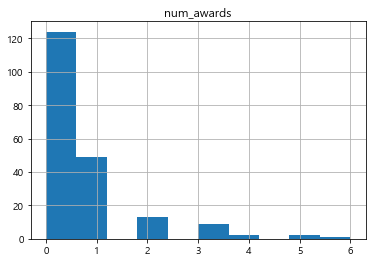

In [44]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

# 데이터 불러오기
# 종속변수인 'num_awards'가 정규분포가 아닌 포아송 분포를 따른다고 본다.
awards = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/8-1-4_awards.csv')
X = awards.filter(['prog', 'math']) # 등록한 프로그램 타입, 기말고사 수학 성적

# 프로그램 타입: 1. general, 2. academic, 3. vocational
X = pd.get_dummies(X, drop_first=True, columns=['prog'])
y = awards.filter(['num_awards']) # 한 고등학교에서 학생들이 받은 상의 개수
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("y의 분포: ")
y.hist()
plt.show()

In [45]:
# 파라미터 alpha가 커질수록 규제가 커지고, alpha가 0이면 규제가 없는 것과 같다. 
PR = PoissonRegressor(alpha=0.2)
PR.fit(X_train, y_train.values.ravel())
train_score = PR.score(X_train, y_train.values.ravel())
test_score = PR.score(X_test, y_test.values.ravel())

pred = PR.predict(X) # 예측값

result = pd.DataFrame()
result['pred'] = pred
result['y'] = y

# 회귀식을 반환하는 함수 정의
def regression_formula(feature_names, coef, intercept):
    msg = "y = "
    for i, feature in enumerate(feature_names):
        coef = coef.ravel()
        msg += "+ {:.3f}*'{}' ".format(coef[i], feature)
    if intercept.shape == (1,):
        intercept = intercept[0]
    else:
        intercept = intercept
    msg += "+ {:.3f}".format(intercept)
    msg = msg[:4] + msg[6:]
    return msg

print("train score {:.3f}, test score {:.3f}\n".format(train_score, test_score))
print("포아송 회귀식: \n", regression_formula(X.columns, PR.coef_, PR.intercept_))

train score 0.327, test score 0.301

포아송 회귀식: 
 y = 0.078*'math' + 0.311*'prog_2' + -0.119*'prog_3' + -5.053


In [46]:
# XBeta값(설명변수의 선형 결합)과 지수 함수값(평균함수값) 구하기
data_idx = 194
XB = (X.iloc[data_idx, :]*PR.coef_).sum()+PR.intercept_ #회귀식에 x값을 대입한 값
mu = PR.predict(X.iloc[data_idx, :].values.reshape(-1,len(X.columns)))[0]
mu2 = np.exp(XB)

print(" {}번 데이터의 features: {}".format(data_idx, X.iloc[data_idx, :].values))
print(" {}번 데이터의 선형 함수 값 (XBeta): {:.3f}".format(data_idx, XB))
print(" {}번 데이터의 지수 함수 값 (mu): {:.3f} (={:.3f})".format(data_idx, mu, mu2) )

 194번 데이터의 features: [60  1  0]
 194번 데이터의 선형 함수 값 (XBeta): -0.052
 194번 데이터의 지수 함수 값 (mu): 0.949 (=0.949)


In [47]:
pred = PR.predict(X)
result = pd.DataFrame()
result['pred'] = pred
result['Xbeta'] = np.log(pred)
result['y'] = y
print("예측빈도값과 실제빈도값:\n", result.tail(6))
## 모델 자체의 성능이 좋지 못한 상황이지만, 198번 데이터를 제외한 나머지 데이터들은 실제값에 근사하게 예측해냈다.

예측빈도값과 실제빈도값:
          pred     Xbeta  y
194  0.949226 -0.052109  1
195  2.242673  0.807668  2
196  1.995194  0.690741  2
197  2.242673  0.807668  1
198  2.424996  0.885830  0
199  2.622142  0.963992  3


In [48]:
# 회귀계수의 해석
feat_idx = 0
spec_X = X.iloc[data_idx, :].values

# 회귀계수 확인
print("feature '{}'의 회귀계수 {:.3f}: ".format(X.columns[feat_idx], PR.coef_[feat_idx]))
print(" ==> exp(회귀계수): {:.3f}\n".format(np.exp(PR.coef_[feat_idx])))

# 특정 feature의 한단위 증가 전 데이터와 예측값 y 확인
before_pred = PR.predict(spec_X.reshape(-1, len(spec_X)))[0]
print(" (증가 전) {}번 데이터의 features: {}".format(data_idx, spec_X))
print(" (증가 전)'{}'의 값이 {:.3f}일 때, y는 {:.3f}".format(X.columns[feat_idx], spec_X[feat_idx], before_pred))

# 특정 feature의 한단위 증가 후 데이터와 예측값 y 확인
spec_X[feat_idx] = spec_X[feat_idx] +1
after_pred = PR.predict(spec_X.reshape(-1,len(spec_X)))[0]
print(" (증가 후) {}번 데이터의 features: {}".format(data_idx, spec_X))
print(" (증가 후)'{}'의 값이 {:.3f}일 때, y는 {:.3f}".format(X.columns[feat_idx], spec_X[feat_idx], after_pred))

print("\n ==> x가 한단위 증가한 후의 빈도수는 증가 전 빈도수의 {:.3f}배가 된다. (= 증가 후 빈도수 / 증가 전 빈도수)".format(after_pred/before_pred))

## x가 한단위 증가하면, 증가 후 빈도수가 증가 전의 1.081배 된다는 의미이다.
## 즉, 해당 feature는 값이 증가할수록 반응변수의 확률값이 점점 증가하게 된다.

feature 'math'의 회귀계수 0.078: 
 ==> exp(회귀계수): 1.081

 (증가 전) 194번 데이터의 features: [60  1  0]
 (증가 전)'math'의 값이 60.000일 때, y는 0.949
 (증가 후) 194번 데이터의 features: [61  1  0]
 (증가 후)'math'의 값이 61.000일 때, y는 1.026

 ==> x가 한단위 증가한 후의 빈도수는 증가 전 빈도수의 1.081배가 된다. (= 증가 후 빈도수 / 증가 전 빈도수)


In [49]:
# statsmodels를 통해서도 회귀 적합할 수 있다.
# 다만, sklearn에서 적합한 회귀식과 다른 결과가 나오게 되는데, sklearn에서 자동으로 규제를 적용하고 있기 때문이다.
# sklearn의 alpha를 0으로 설정하여 규제가 없다시피 하면, 두 라이브러리의 회귀식이 유사 해진다.
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
fitted = model.fit()
test_a = 0.05
cv = chi2.ppf(1-test_a, fitted.df_resid) #오른쪽 검정
print("critical value: {:.3f}".format(cv))

critical value: 175.198


In [50]:
# 포아송회귀 모델의 유의성 확인
# Pearson chi2 통계량 계산 (자유도가 n-k-1인 카이제곱분포를 따름)
pearson = pd.DataFrame(y_train)
pearson['pred'] = fitted.fittedvalues
pearson['squared_gap'] = (pearson['num_awards'] - pearson['pred'])**2
pearson['squared_gap/pred'] = pearson['squared_gap'] / pearson['pred']
pstats = pearson['squared_gap/pred'].sum()
pval = 1-chi2.cdf(pstats, fitted.df_resid)
print("pearson chi2 stats: {:.3f}(={:.3f}), p-value: {:.3f}".format(pstats, fitted.pearson_chi2, pval))

pearson chi2 stats: 163.211(=163.211), p-value: 0.157


In [53]:
# deviance 통계량 계산 (자유도가 n-k-1인 카이제곱분포를 따름)
deviance = pd.DataFrame(y_train['num_awards'])
deviance['pred'] = fitted.fittedvalues
deviance['Log'] = np.log(deviance['num_awards']/deviance['pred'])*deviance['num_awards']
deviance['num-pred'] = deviance['num_awards'] - deviance['pred']
dstats = deviance['Log'].sum()*2 - deviance['num-pred'].sum()*2
pval2 = (1-chi2.cdf(dstats, fitted.df_resid))**2
print("deviance chi2 stats: {:.3f}, p-value: {:.3f}".format(dstats, pval2))
print("R2: {:.3f}".format(1-fitted.llf/fitted.llnull))
## 따라서 해당 모델은 Pearson chi2 및 deviance 검정 결과, 귀무가설을 기각할 수 없으므로 통계적으로 유의하다.

deviance chi2 stats: 140.625, p-value: 0.372
R2: 0.224


In [54]:
# statsmodels의 요약 결과 확인
print(fitted.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             num_awards   No. Observations:                  150
Model:                            GLM   Df Residuals:                      146
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.21
Date:                Tue, 16 Apr 2024   Deviance:                       140.62
Time:                        23:55:03   Pearson chi2:                     163.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2428      0.777     -6.748      0.0

In [56]:
# math의 회귀계수의 유의성 확인하기
# 위의 요약 결과에서는 회귀계수의 유의성 확인을 위해 z통계량을 사용하고 있으나,
# 아래와 같이 z통계량을 제곱한 wald통계량을 통해서도 회귀계수의 유의성을 확인할 수 있다.
z = (0.0673/0.012)
waldstat = z**2 #위의 report에서 확인한 math의 회귀계수와 표준오차
cv = chi2.ppf(1-test_a, 1)
sp = 1-chi2.cdf(waldstat, 1)
print(f"Z 통계량 {z:.3f}")
print("wald 통계량 {:.3f}, 임곗값: {:.3f}".format(waldstat, cv))
print("유의수준 {:.3f}, 해당 통계량의 유의확률 {:.3f}".format(test_a, sp))
# 따라서 해당 회귀계수는 통계적으로 유의하다

Z 통계량 5.608
wald 통계량 31.453, 임곗값: 3.841
유의수준 0.050, 해당 통계량의 유의확률 0.000


### 8-1-5. 이상치에 강한 선형 회귀

#### Robust regression
- 일반적으로 선형 회귀 모델에서는 회귀계수를 추정할 때 잔차의 제곱합을 이용하는 '최소 제곱법'을 사용한다.
- 그런데 이런 경우 데이터의 이상치(Outlier)에 전체 추정치가 왜곡되는 문제가 발생한다.
- Robust regression은 이런 문제의 대안으로서 잔차의 제곱 대신 절댓값의 합이 최소가 되도록 계수를 추정함으로써 이상치의 영향력을 줄인다.
- scikit-learn의 HuberRegressor는 표준화된 잔차의 절댓값이 epsilon보다 작으면 샘플의 squared loss를 최적화하고, epsilon보다 크면 absolute loss를 최적화 하면서 회귀계수들을 찾아가는 방식이다.
- 파라미터 epsilon은 이상치로 분류되어야 하는 샘플의 개수를 컨트롤 하는데 1부터 무한대의 값을 가지며, epsilon의 값이 작을수록 이상치에 더 강건하게(Robust) 된다.
- 아래에서는 이상치를 포함하는 데이터를 임의로 생성한 후, scikit-learn의 클래스인 HuberRegressor와 LinearRegression으로 적합해 보았다.
- 그 결과, 결정계수 면에서는 두 모델 모두 낮은 값을 나타냈지만, 데이터 시각화를 통해 HuberRegressor로 적합하고 예측한 값들이 원본 데이터의 일반적인 흐름을 잘 나타냄을 확인하였다.

In [57]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

rng = np.random.RandomState(0)

## 이상치 포함하는 데이터 생성하기
# 1개의 feature를 가진 사이즈 30의 데이터 생성
X, y =  make_regression(n_samples=30, n_features=1, random_state=0, noise=4.0, bias=100.0)

# 4개의 outlier를 생성하여 데이터에 추가
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() #outlier의 반은 더 크게
X_outliers[2:, :] += X.min() - X.mean() #outlier의 반은 더 작게
y_outliers[:2] += y.min() - y.mean()
y_outliers[2:] += y.max() + y.mean()
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

In [58]:
# Robust regression 적합
HR = HuberRegressor(epsilon=1).fit(X, y)
HR_pred = HR.predict(X)
print("Huber coefficients {}, score {:.3f}".format(HR.coef_, HR.score(X, y)))

# 선형회귀 적합
LR = LinearRegression().fit(X, y)
LR_pred = LR.predict(X)
print("Linear coefficients {}, score {:.3f}".format(LR.coef_, LR.score(X, y)))

Huber coefficients [94.20831622], score -0.820
Linear coefficients [-10.91352281], score 0.009


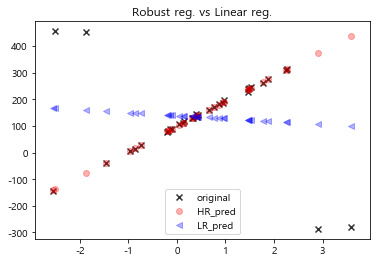

In [59]:
# 실제값과 두 회귀의 예측값을 비교
fig, ax = plt.subplots(1,1)
ax.set_title("Robust reg. vs Linear reg.")
ax.scatter(X, y, color = 'black', alpha=0.8, marker='x')
ax.scatter(X, HR_pred, color='red', alpha=0.3, marker='o')
ax.scatter(X, LR_pred, color='blue', alpha=0.3, marker='<')
plt.legend(['original', 'HR_pred', 'LR_pred'])
plt.show()

## Huber regression(Robust)이 Linear regression보다 이상치에 민감하지 않고 (강건하게) 일반적인 데이터를 잘 설명하도록 적합한 것으로 나타났다.

#### Quantile regression
- Quantile regression은 평균이 아니라 특정 분위값을 추정하는 기법이다.
- Quantile regression으로 50% 분위값(중앙값)을 추정하는 모델을 만들면 이상치의 영향을 거의 받지 않게 된다.
- 이상치의 값이 아무리 비정상적으로 크더라도 전체 관측값들의 분위는 영향을 받지 않기 때문이다.
- 또한, 분산이 일정하지 않은 이분산(Heteroscedasticity) 데이터도 Quantile regression으로 회귀 모델링이 가능하다.
- scikit-learn의 QuantileRegressor는 입력된 분위값에 따른 pinball loss를 최적화하는 방식이며, 분위값의 기본값은 0.5(중앙값)이다.
- L1 규제를 적용할 수 있고, 규제 정도는 파라미터 alpha 값을 통해 조절할 수 있다.

In [60]:
from sklearn.linear_model import QuantileRegressor

# QuantileRegressor 적합
QR = QuantileRegressor(alpha=0).fit(X, y)
QR_pred = QR.predict(X)
print("Quantile coefficients {}, score {:.3f}".format(QR.coef_, QR.score(X, y)))

# 선형회귀 적합
LR = LinearRegression().fit(X, y)
LR_pred = LR.predict(X)
print("Linear coefficients {}, score {:.3f}".format(LR.coef_, LR.score(X, y)))

ImportError: cannot import name 'QuantileRegressor' from 'sklearn.linear_model' (C:\Users\kimmi\Anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_title("Quantile reg. vs Linear reg.")
ax.scatter(X, y, color = 'black', alpha=0.8, marker='x')
ax.scatter(X, QR_pred, color='green', alpha=0.3, marker='o')
ax.scatter(X, LR_pred, color='blue', alpha=0.3, marker='<')
plt.legend(['original', 'QR_pred', 'LR_pred'])
plt.show()

## 8-2. 비선형 회귀
- 응답변수와 예측변수 간의 관계가 반드시 선형일 필요는 없다.
- 비선형 효과를 회귀 분석에 담기 위해 회귀모형을 확장하는 여러가지 방법들이 있다.
- 다항 회귀, 스플라인 회귀, 일반화가법모형 등이다.

### 다항 회귀(Polynomial regression)
- 다항 회귀는 2차 함수 이상의 다항 함수를 이용해 두 변수 간의 관계를 설명하는 알고리즘이다.
- 단순 선형 모델의 한계를 일부 보완할 수 있다.

sklearn R2: 0.899


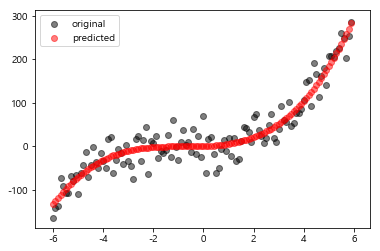

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     342.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.89e-57
Time:                        00:11:05   Log-Likelihood:                -572.92
No. Observations:                 120   AIC:                             1154.
Df Residuals:                     116   BIC:                             1165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6500      3.992      0.163      0.8

In [61]:
# 데이터 생성
x = np.arange(-6.0, 6.0, 0.1)
y = 1*(x**3) + 2*(x**2) + 1*x + 3
y_noise = 30 * np.random.normal(size=x.size)
y = y + y_noise

# 다항 회귀 적합 1 (w/ sklearn)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# degree: 다항식 차수 지정
# include_bias: 절편 추가여부

poly_features = PolynomialFeatures(degree=3, include_bias=True)
px = poly_features.fit_transform(x.reshape(-1,1))

LR = LinearRegression()
LR.fit(px, y)
pred = LR.predict(px)
print("sklearn R2: {:.3f}".format(LR.score(px, y)))

# 원본 데이터와 예측 데이터 비교
fig, ax = plt.subplots(1,1)
ax.scatter(x, y, alpha=0.5, color='black')
ax.scatter(x, pred, alpha=0.5, color='red')
ax.legend(['original', 'predicted'])
plt.show()

# 다항 회귀 적합 2 (w/ statsmodels)
import statsmodels.api as sm
model = sm.OLS(y, px) #sklearn의 PolynomialFeatures로 변환한 feature를 사용
fitted = model.fit()
print(fitted.summary())

### 스플라인 회귀 (Spline regression)
- 스플라인 회귀는 다항 구간들을 부드러운 곡선 형태로 적합하는 방법이다.
- 스플라인 구간을 구분하는 값을 매듭(Knot)이라고 한다.
- 구간별 다항식은 예측변수를 위한 매듭 사이를 부드럽게 연결한다.
- scikit-learn의 SplineTransformer에서는 매듭의 개수(n_knots)와 차수(degree)를 지정함으로써 기본 스플라인 항(B-spline)을 적용하게 된다.
- n_splines = n_knots + degree - 1(extrapolation='periodic'의 경우 n_knots - 1)의 원리로 스플라인 항의 개수가 정해지고 이에 따라 새로운 특징 데이터를 생성한다.
- 스플라인 항의 계수는 해석하기 어렵지만 단순 선형 회귀 모델의 한계를 일부 보완할 수 있다.

In [62]:
# 앞선 데이터를 동일하게 사용
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression

# 스플라인 회귀 적합 1 (w/ sklearn)
spline = SplineTransformer(degree=3, n_knots=4)
sx = spline.fit_transform(x.reshape(-1,1))

LR = LinearRegression()
LR.fit(sx, y)
pred = LR.predict(sx)
print("sklearn R2: {:.3f}".format(LR.score(sx, y)))

# 원본 데이터와 예측 데이터 비교
fig, ax = plt.subplots(1,1)
ax.scatter(x, y, alpha=0.5, color='black')
ax.scatter(x, pred, alpha=0.5, color='red')
ax.legend(['original', 'predicted'])
plt.show()

# 스플라인 회귀 적합 2 (w/ statsmodels)
import statsmodels.api as sm
model = sm.OLS(y, sx) #sklearn의 SplineTransformer로 변환한 feature를 사용
fitted = model.fit()
print(fitted.summary())

ImportError: cannot import name 'SplineTransformer' from 'sklearn.preprocessing' (C:\Users\kimmi\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

## 연습문제

#### 1. 
- 다음은 인도 벵갈루루의 집값 데이터이다.
- 데이터는 집의 특징을 나타내는 입력 변수들과 집값의 출력 변수로 구성되어 있다.
- 데이터 컬럼 정의서는 아래와 같을 때, 선형 회귀 분석을 수행하시오.

|변수|설명|
|-|-|
|availabilty|즉시 입주 가능 여부|
|size|방, 거실, 주방 구성에 따른 집 크기 등급|
|bath|화장실 개수|
|balcony|발코니 개수|
|total_sqft|전체 면적|
|area_type|Carpet, Plot, Super built-up, built-up의 범주로 이루어진 범주형 변수, 면적의 종류를 의미|
|price|집 가격|

In [63]:
realestate = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
realestate.head(3)

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super,0,3,1056.0,2,1,39.07
1,Plot,1,6,2600.0,5,3,120.00
2,Super,1,5,1521.0,3,1,95.00


In [64]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# feature에서 범주형 변수를 더미코딩하고, 상수항을 추가한 후, 데이터를 train/test set으로 분할
X = pd.get_dummies(realestate.drop('price', axis=1), columns=['area_type'], drop_first=True)
X = sm.add_constant(X)
y = realestate['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# 현재 데이터로 선형회귀 분석을 수행
model1 = sm.OLS(y_train, X_train)
fitted1 = model1.fit()
print(fitted1.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred1 = fitted1.predict(X_test)
print(">>> test score {:.3f}".format(r2_score(y_test, pred1)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     656.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:19:06   Log-Likelihood:                -32305.
No. Observations:                5621   AIC:                         6.463e+04
Df Residuals:                    5612   BIC:                         6.469e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -62.1571      4.615  

#### 2. 
- 앞선 모델에서 변수 area_type과 total_sqft의 교호작용항을 추가하여 회귀분석을 수행하시오.

In [65]:
# area_type과 total_sqft의 교호작용항을 추가한 X_train2, X_test2 생성
X_train2, X_test2 = X_train.copy(), X_test.copy()

for col in ['area_type_Carpet', 'area_type_Plot', 'area_type_Super']:
    X_train2[f"at_{col[10:]}:total_sqft"] = X_train[col] * X_train['total_sqft']
    X_test2[f"at_{col[10:]}:total_sqft"] = X_test[col] * X_test['total_sqft']

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model2 = sm.OLS(y_train, X_train2)
fitted2 = model2.fit()
print(fitted2.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred2 = fitted2.predict(X_test2)
print(">>> test score {:.3f}".format(r2_score(y_test, pred2)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     556.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:19:42   Log-Likelihood:                -32088.
No. Observations:                5621   AIC:                         6.420e+04
Df Residuals:                    5609   BIC:                         6.428e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -28.2105 

#### 3.
- 앞선 모델에서 변수 total_sqft의 이차항을 추가하여 회귀분석을 수행하시오.

In [66]:
# total_sqft의 이차항을 추가한 X_train3, X_test3 생성
X_train3, X_test3 = X_train2.copy(), X_test2.copy()
X_train3["total_sqft2"] = X_train2['total_sqft']**2
X_test3["total_sqft2"] = X_test2['total_sqft']**2

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model3 = sm.OLS(y_train, X_train3)
fitted3 = model3.fit()
print(fitted3.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred3 = fitted3.predict(X_test3)
print(">>> test score {:.3f}".format(r2_score(y_test, pred3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     847.8
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:20:06   Log-Likelihood:                -31254.
No. Observations:                5621   AIC:                         6.253e+04
Df Residuals:                    5608   BIC:                         6.262e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -40.6111 

#### 4.
- 앞선 모델에서 변수 선택 과정을 거쳐 최종 모델을 완성하고 결과를 해석하시오.

In [67]:
# Cook's distance, DFBETAS, DFFITS, LeverageH 등 영향치 기준으로 데이터를 판단하여 영향치를 제거하거나,
# VIF를 통해 다중공선성이 있는 변수를 제거하거나, AIC를 최소로하는 변수의 조합을 찾는 단계적 선택법으로 변수를 선택할 수 있다.
# 여기에서는 통계적으로 유의하지 않은 변수들을 제거함으로써 최종 변수를 선택하고자 한다.

X_train4, X_test4 = X_train3.copy(), X_test3.copy()

# 회귀계수 분석을 위해 feature scaling 진행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train4)
X_train4 = DataFrame(ss.transform(X_train4), columns=X_train4.columns)
X_test4 = DataFrame(ss.transform(X_test4), columns=X_test4.columns)
X_train4['const'] = 1
X_test4['const'] = 1

# 통계적으로 유의하지 않은 변수들 제거
del_feats = ['bath', 'at_Plot:total_sqft', 'availability']
X_train4 = X_train4.drop(del_feats, axis=1)
X_test4 = X_test4.drop(del_feats, axis=1)

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model4 = sm.OLS(y_train.values, X_train4)
fitted4 = model4.fit()
print(fitted4.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred4 = fitted4.predict(X_test4)
print(">>> test score {:.3f}".format(r2_score(y_test, pred4)))

# train score(R-squared) 0.644와 test score 0.726에 의하면, 해당 모델은 데이터에 대한 설명력이 있다고 볼 수 있으며,
# train/test set 성능 차이가 크지 않기 때문에 어느 정도 일반화된 모델이라고 볼 수 있다. 
# 모델의 통계적 유의성은 F-statistic으로 확인할 수 있는데 해당 통계량의 p-value(Prob)가 유의수준 0.05보다 작기 때문에
# 모델은 통계적으로 유의하다고 볼 수 있다. 각 변수에 대한 회귀계수들의 t통계량에 따른 p-value가 모두 유의수준보다 작기 때문에
# 이 회귀계수들 역시 통계적으로 유의하다고 볼 수 있다.
# 또한, 잔차분석을 통해 회귀모형에 대한 가정인 정규성, 등분산성, 독립성을 만족하는지를 확인해야 한다.
# 아래에서 Durbin-Watson 통계량이 2에 가까움으로써 독립성은 만족하고 있지만, Jarque-Bera 통계량의 p-value를 볼 때
# 유의수준보다 작기 때문에 정규성에 위배된다. 이처럼 모델이 회귀모형의 가정을 충족하지 못하는 경우, 추가로 자료를 수집하거나
# 변수 변환의 방법을 통해 가정을 충족하도록 모델을 다시 생성해야 한다.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1128.
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:21:33   Log-Likelihood:                -31259.
No. Observations:                5621   AIC:                         6.254e+04
Df Residuals:                    5611   BIC:                         6.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   97.2994 